In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
from sklearn.metrics import accuracy_score as ac
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
import plotly.express as px


In [88]:
mpl.style.use('fivethirtyeight')
pd.set_option('max_columns',500)
colour_pal=mpl.rcParams['axes.prop_cycle'].by_key()['color']

In [89]:
from fredapi import Fred  # US Fedral Reserve

In [90]:
api_key='bdb84c29cf69600d1df42c696d0d8352' # my secret api key

In [91]:
fred=Fred(api_key)  # asign api with personal key

In [92]:
spdf=fred.search('S&P',order_by='popularity')

In [93]:
spdf.shape

(1000, 15)

In [94]:
spdf.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-08-20,2022-08-20,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-08-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-08-19 09:31:02-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-08-20,2022-08-20,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-07-26 08:02:02-05:00,89,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-08-20,2022-08-20,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-08-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-08-19 09:31:09-05:00,84,This data represents the effective yield of th...
SP500,SP500,2022-08-20,2022-08-20,S&P 500,2012-08-20,2022-08-19,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-08-19 19:13:40-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2022-08-20,2022-08-20,Real Median Household Income in the United States,1984-01-01,2020-01-01,Annual,A,2020 CPI-U-RS Adjusted Dollars,2020 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2021-09-15 08:45:01-05:00,80,Household data are collected as of March. As ...


In [95]:
spdf.describe()

C:\Users\dell\AppData\Local\Temp/ipykernel_5788/2811917595.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  spdf.describe()


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,1,1,938,144,111,11,6,78,82,3,3,663,69,236
top,BAMLH0A0HYM2,2022-08-20 00:00:00,2022-08-20 00:00:00,"Total Credit to Private Non-Financial Sector, ...",1950-01-01 00:00:00,2019-01-01 00:00:00,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:29:04-06:00,3,Source ID: rgdpna When using these data in yo...
freq,1,1000,1000,3,144,351,714,715,287,287,926,926,6,205,88
first,NaN,2022-08-20 00:00:00,2022-08-20 00:00:00,NaN,1851-01-01 00:00:00,1865-11-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-08-20 00:00:00,2022-08-20 00:00:00,NaN,2013-04-01 00:00:00,2022-08-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
spdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, BAMLH0A0HYM2 to CSHGCPUSA156NRUG
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         1000 non-null   object        
 1   realtime_start             1000 non-null   datetime64[ns]
 2   realtime_end               1000 non-null   datetime64[ns]
 3   title                      1000 non-null   object        
 4   observation_start          1000 non-null   datetime64[ns]
 5   observation_end            1000 non-null   datetime64[ns]
 6   frequency                  1000 non-null   object        
 7   frequency_short            1000 non-null   object        
 8   units                      1000 non-null   object        
 9   units_short                1000 non-null   object        
 10  seasonal_adjustment        1000 non-null   object        
 11  seasonal_adjustment_short  1000 non-null   object  

In [97]:
 # spdf.to_csv('S&P data')  to convert it into csv

In [98]:
# pull raw data

In [99]:
sp500=fred.get_series(series_id='SP500')

<AxesSubplot:title={'center':'S&P 500'}>

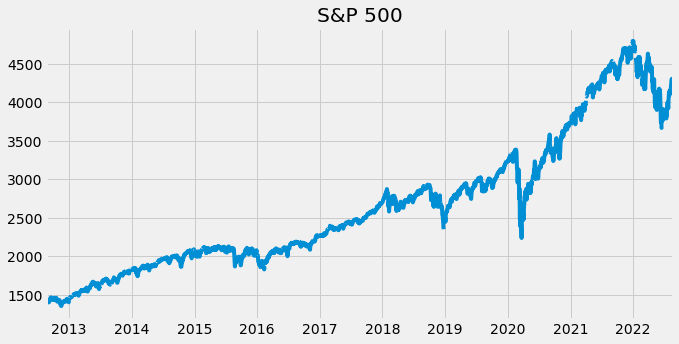

In [100]:
sp500.plot(figsize=(10,5),title='S&P 500')

In [101]:
# 4. Pull and join multiple data series

In [102]:
ue=fred.search('unemployment')

In [104]:
ue.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-08-20,2022-08-20,Unemployment Rate,1948-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:02-05:00,91,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-08-20,2022-08-20,Unemployment Rate,1948-01-01,2022-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-08-05 07:43:03-05:00,54,The unemployment rate represents the number of...
NROU,NROU,2022-08-20,2022-08-20,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,65,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2022-08-20,2022-08-20,Continued Claims (Insured Unemployment),1967-01-07,2022-08-06,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-08-18 07:40:01-05:00,70,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2022-08-20,2022-08-20,Unemployment Level,1948-01-01,2022-07-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-08-05 07:44:11-05:00,65,The series comes from the 'Current Population ...


In [105]:
unrate=fred.get_series('UNRATE')

In [106]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-03-01    3.6
2022-04-01    3.6
2022-05-01    3.6
2022-06-01    3.6
2022-07-01    3.5
Length: 895, dtype: float64

<AxesSubplot:>

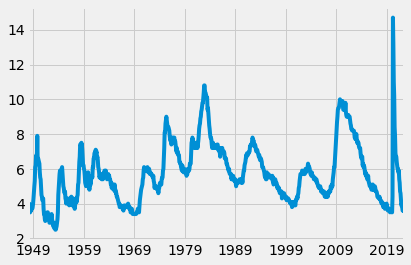

In [107]:
unrate.plot()

In [108]:
uedf=fred.search('unemployment state',filter=('frequency','Monthly'))

In [109]:
uedf=uedf.query('seasonal_adjustment_short == "SA" and units == "Percent"')

In [110]:
uedf

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-08-20,2022-08-20,Unemployment Rate,1948-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:02-05:00,91,The unemployment rate represents the number of...
U6RATE,U6RATE,2022-08-20,2022-08-20,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:07-05:00,66,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2022-08-20,2022-08-20,Unemployment Rate - Black or African American,1972-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:08-05:00,67,The series comes from the 'Current Population ...
LNS14000031,LNS14000031,2022-08-20,2022-08-20,"Unemployment Rate - 20 Yrs. & over, Black or A...",1972-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:15-05:00,57,The series comes from the 'Current Population ...
CAUR,CAUR,2022-08-20,2022-08-20,Unemployment Rate in California,1976-01-01,2022-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-07-25 09:42:01-05:00,54,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14100000,LNS14100000,2022-08-20,2022-08-20,Unemployment Rate Full-Time Workers,1968-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:45:11-05:00,7,The series comes from the 'Current Population ...
LNS13023570,LNS13023570,2022-08-20,2022-08-20,New Entrants as a Percent of Total Unemployed,1967-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:47-05:00,3,The series comes from the 'Current Population ...
LNS14000015,LNS14000015,2022-08-20,2022-08-20,"Unemployment Rate - 16-19 Yrs., White",1954-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:45:12-05:00,6,The series comes from the 'Current Population ...


In [111]:
uedf=uedf.loc[uedf['title'].str.contains('Unemployment Rate')] # filtering out data storing unemployment rate

In [112]:
# new uedf
uedf.shape

(102, 15)

In [140]:
uedf.info
uedf=pd.DataFrame(uedf)
uedf

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-08-20,2022-08-20,Unemployment Rate,1948-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:02-05:00,91,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2022-08-20,2022-08-20,Unemployment Rate - Black or African American,1972-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:08-05:00,67,The series comes from the 'Current Population ...
LNS14000031,LNS14000031,2022-08-20,2022-08-20,"Unemployment Rate - 20 Yrs. & over, Black or A...",1972-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:15-05:00,57,The series comes from the 'Current Population ...
CAUR,CAUR,2022-08-20,2022-08-20,Unemployment Rate in California,1976-01-01,2022-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-07-25 09:42:01-05:00,54,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2022-08-20,2022-08-20,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,50,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14023705,LNS14023705,2022-08-20,2022-08-20,Unemployment Rate - Job Leavers,1967-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:45:19-05:00,7,The series comes from the 'Current Population ...
LNS14000093,LNS14000093,2022-08-20,2022-08-20,Unemployment Rate - 45-54 Yrs.,1948-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:45:19-05:00,7,The series comes from the 'Current Population ...
LNS14100000,LNS14100000,2022-08-20,2022-08-20,Unemployment Rate Full-Time Workers,1968-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:45:11-05:00,7,The series comes from the 'Current Population ...


In [116]:
fin=[];
for i in uedf.index:
    results=fred.get_series(i)
    result=results.to_frame(name=i)
    fin.append(result)
    break

In [121]:
results

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-03-01    3.6
2022-04-01    3.6
2022-05-01    3.6
2022-06-01    3.6
2022-07-01    3.5
Length: 895, dtype: float64

In [135]:
fin

[            UNRATE
 1948-01-01     3.4
 1948-02-01     3.8
 1948-03-01     4.0
 1948-04-01     3.9
 1948-05-01     3.5
 ...            ...
 2022-03-01     3.6
 2022-04-01     3.6
 2022-05-01     3.6
 2022-06-01     3.6
 2022-07-01     3.5
 
 [895 rows x 1 columns]]

In [141]:
pd.concat([uedf,fin],axis=1)

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid